Accuracy: 0.8933333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.86      0.75      0.80        16
           2       0.95      0.98      0.97        43

    accuracy                           0.89        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.89      0.89      0.89        75



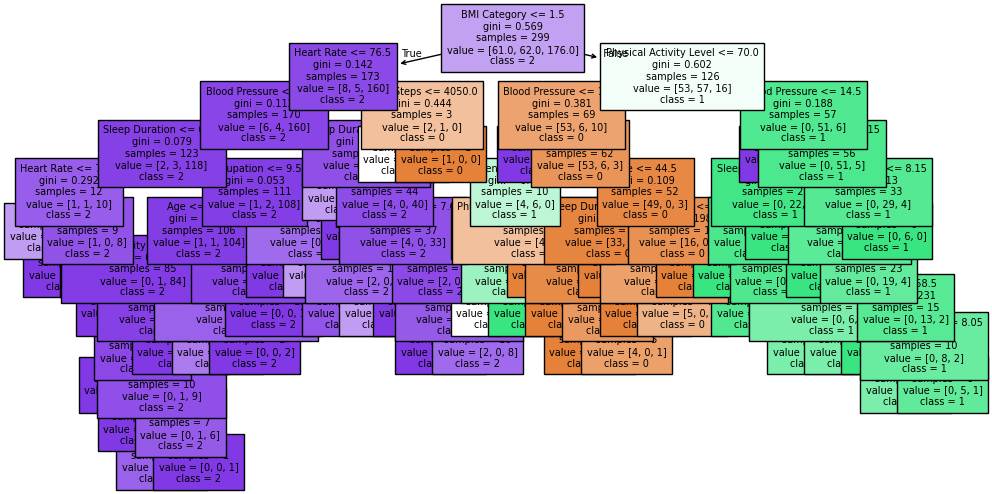

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

file_path = "Sleep_health_and_lifestyle_dataset.csv"  # Update this

df = pd.read_csv(file_path)

df = df.drop(columns=["Person ID"])

label_encoders = {}
categorical_cols = ["Gender", "Occupation", "BMI Category", "Blood Pressure", "Sleep Disorder"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=["Sleep Disorder"])
y = df["Sleep Disorder"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

plt.figure(figsize=(12, 6))
class_names = [str(cls) for cls in set(y)]  # Convert class labels to strings
tree.plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=True, fontsize=7)
plt.show()

